In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Input_path='EMG-data.csv'

In [2]:
dataset=pd.read_csv(Input_path)
print(dataset.shape)
print("\nempty values:",dataset.isnull().any().sum())

(4237907, 11)

empty values: 0


In [3]:
dataset=dataset.drop(columns=["time"])
Class = dataset["class"]
print(Class.unique())
print("Value Count :\n", dataset["class"].value_counts())

[0 1 2 3 4 5 6 7]
Value Count :
 0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: class, dtype: int64


In [4]:
print(dataset.shape)

(4237907, 10)


In [5]:
index_numbers_1=dataset[dataset["class"]==0].index 
dataset.drop(index_numbers_1,inplace=True)

index_numbers_2=dataset[dataset["class"]==7].index
dataset.drop(index_numbers_2,inplace=True)

In [6]:
print(dataset.shape)

(1499054, 10)


In [7]:
dataset=dataset.groupby(['label','class'])

In [8]:
def rms(data):
      return  np.sqrt(np.mean(data**2,axis=0))  

def SSI(data):
    return np.sum(data**2,axis=0)

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)

def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [9]:
dataset=dataset.agg(['min','max',rms,SSI,abs_diffs_signal,np.ptp])
print(dataset.shape)

(216, 48)


In [10]:
dataset=dataset.reset_index()
print(dataset.shape)
dataset.head()



(216, 50)


label class channel1                                                         \
                   min      max       rms       SSI abs_diffs_signal      ptp   
0     1     1 -0.00005  0.00004  0.000017  0.000002          0.01070  0.00009   
1     1     2 -0.00111  0.00095  0.000210  0.000301          0.16819  0.00206   
2     1     3 -0.00087  0.00112  0.000188  0.000260          0.14544  0.00199   
3     1     4 -0.00020  0.00016  0.000056  0.000022          0.03609  0.00036   
4     1     5 -0.00031  0.00061  0.000066  0.000030          0.04939  0.00092   

  channel2           ...  channel7                                      \
       min      max  ...       rms       SSI abs_diffs_signal      ptp   
0 -0.00010  0.00007  ...  0.000013  0.000001          0.00870  0.00006   
1 -0.00047  0.00041  ...  0.000216  0.000318          0.16251  0.00153   
2 -0.00113  0.00127  ...  0.000078  0.000044          0.05866  0.00063   
3 -0.00038  0.00024  ...  0.000118  0.000095          0.07517  0.00090   
4 -0.00066  0.00035  ...  0.000084  0.000049          0.06768  0.00055   

  channel8                                                         
       min      max       rms       SSI abs_diffs_signal      ptp  
0 -0.00005  0.00002  0.000014  0.000001          0.00921  0.00007  
1 -0.00070  0.00054  0.000150  0.000153          0.11696  0.00124  
2 -0.00073  0.00051  0.000161  0.000190          0.11869  0.00124  
3 -0.00032  0.00026  0.000083  0.000047          0.04984  0.00058  
4 -0.00030  0.00045  0.000060  0.000025          0.04606  0.00075  

[5 rows x 50 columns]

In [18]:
temp2=dataset

c:\Users\pokar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
c:\Users\pokar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


     channel1                                                           \
          min       max       rms       SSI abs_diffs_signal       ptp   
78   1.303169 -1.325513 -1.049295 -0.621942        -1.026376 -1.329781   
33   0.895710 -0.872895 -0.671171 -0.562726        -0.685279 -0.894633   
34   0.751902 -0.825251 -0.684654 -0.562567        -0.690942 -0.797933   
62  -1.573009  1.437840  1.185533  0.901211         1.163106  1.522861   
97   0.488252  0.103807 -0.518619 -0.516912        -0.614228 -0.193560   
..        ...       ...       ...       ...              ...       ...   
206 -1.644914  1.628416  2.850013  3.451415         2.802409  1.655823   
160  0.104761  1.128154 -0.367894 -0.442956        -0.376300  0.519601   
130  0.847774 -1.015827 -0.800146 -0.590935        -0.779689 -0.942982   
116 -1.357296  1.628416  1.896537  1.931792         2.066860  1.510773   
73  -0.877933  0.627891  0.430232  0.236343         1.096656  0.761350   

     channel2                        

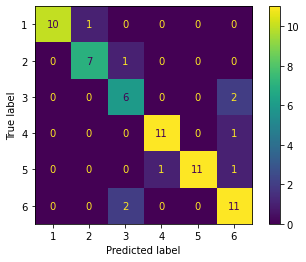

In [22]:
## Training SVM Classifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
estimators=[]
accuracy=[]
f1_macro=[]
svc=SVC(C=90,kernel='poly',gamma=0.01,decision_function_shape='ovr')
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
##Training and testing set splitting
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)

## Data normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

svc.fit(X_train,y_train)
y_test_pred=svc.predict(X_test)
y=f1_score(y_test,y_test_pred,average='macro') 
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)


print(X_test)
print (y_test)
print(y_test_pred)

print("\n\n\n\nAccuracy_SVM_Poly: ", a)
print("F1_Score_SVM: " , y)
print("Confusion Matrix: \n\n", x)
estimators.append(print_estimator_name(svc))
f1_macro.append(y)
accuracy.append(a)
plot_confusion_matrix(svc,X_test,y_test)
plt.show()

In [23]:
X_test.to_csv('x_test.csv', index=False)

X_train.to_csv('x_train.csv', index = False)

y_train.to_csv('y_train.csv', index = False)

In [32]:
import pickle

# Assuming you have trained or loaded your model and stored it in a variable called 'model'
# You can replace 'model' with the actual name of your model

# Save the model to a pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(svc, file)


In [25]:
# Load the CSV file containing the test data
test_data = pd.read_csv('testing2.csv')

# Load the trained classifier (assuming it is already trained and stored as 'svc')
classifier = SVC(C=100, kernel='poly', gamma=0.01, decision_function_shape='ovo')
classifier.fit(X_train, y_train)  # Assuming you have trained the classifier on the training data

# Perform prediction on the test data
predicted_labels = svc.predict(test_data)

# Print the predicted labels
print("Predicted labels for the test data:")
print(predicted_labels[0])

pred_class = 2

Predicted labels for the test data:
4


c:\Users\pokar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


C:\Users\Shree\AppData\Local\Temp\ipykernel_11816\1712798340.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])
C:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)






Accuracy_KNN:  0.8461538461538461
F1_Score_KNN:  0.834884801189149
Confusion Matrix: 

 [[11  0  0  0  0  0]
 [ 0  7  1  0  0  0]
 [ 1  0  5  0  0  2]
 [ 0  0  0 12  0  0]
 [ 1  0  0  2 10  0]
 [ 0  1  2  0  0 10]]


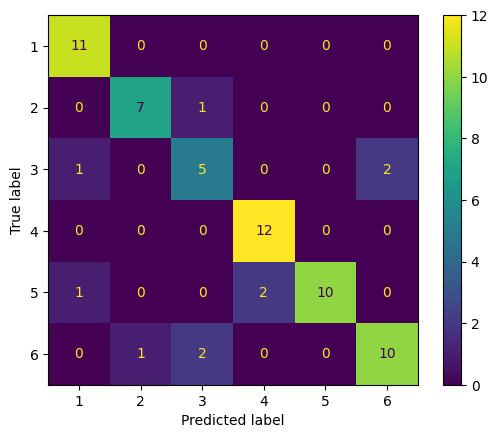

In [ ]:
## Training KNN Classifier
dataset=temp2
knn=KNeighborsClassifier(metric='minkowski',algorithm= 'auto',n_neighbors=10,p=2,weights='distance',leaf_size=5)
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
knn.fit(X_train,y_train)
y_test_pred=knn.predict(X_test)
y=f1_score(y_test,y_test_pred,average='macro') 
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)

print("\n\n\n\nAccuracy_KNN: ", a)
print("F1_Score_KNN: " , y)
print("Confusion Matrix: \n\n", x)

estimators.append(print_estimator_name(knn))
f1_macro.append(y)
accuracy.append(a)
plot_confusion_matrix(knn,X_test,y_test)
plt.show()

In [20]:
# Load the CSV file containing the test data
test_data = pd.read_csv('D:/EDI/SEM 6/testing2.csv')

# Perform prediction on the test data
predicted_labels = knn.predict(test_data)

# Print the predicted labels
print("Predicted labels for the test data:")
print(predicted_labels[0])

FileNotFoundError: [Errno 2] No such file or directory: 'D:/EDI/SEM 6/testing2.csv'

C:\Users\Shree\AppData\Local\Temp\ipykernel_11816\3090464449.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])
C:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7236868686868686
[[11  0  0  0  0  0]
 [ 0  6  1  0  1  0]
 [ 0  3  4  0  0  1]
 [ 0  0  0 11  1  0]
 [ 0  2  1  1  9  0]
 [ 0  3  2  1  0  7]]
0.7384615384615385


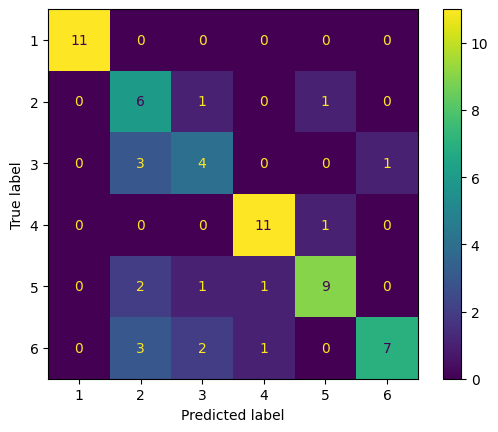

In [ ]:
## Training Decision Tree Classifier
dataset=temp2
dt=DecisionTreeClassifier(criterion= 'entropy', max_depth= 50, max_features= 5, max_leaf_nodes= 50,min_samples_split=2)
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
dt.fit(X_train,y_train)
y_test_pred=dt.predict(X_test)
y=f1_score(y_test,y_test_pred,average='macro') 
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
print(y)
print(x)
print(a)
estimators.append(print_estimator_name(dt))
f1_macro.append(y)
accuracy.append(a)
plot_confusion_matrix(dt,X_test,y_test)
plt.show()

In [ ]:
# Load the CSV file containing the test data
test_data = pd.read_csv('D:/EDI/SEM 6/testing2.csv')

# Perform prediction on the test data
predicted_labels = dt.predict(test_data)

# Print the predicted labels
print("Predicted labels for the test data:")
print(predicted_labels[0])

Predicted labels for the test data:
3


C:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


C:\Users\Shree\AppData\Local\Temp\ipykernel_11816\1331023285.py:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


F1_macro= 0.8056852370577862
[[11  0  0  0  0  0]
 [ 0  7  0  0  1  0]
 [ 0  1  2  0  0  5]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 13  0]
 [ 0  1  2  0  0 10]]
Accuracy= 0.8461538461538461
OOB validation score= 0.8278145695364238


C:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


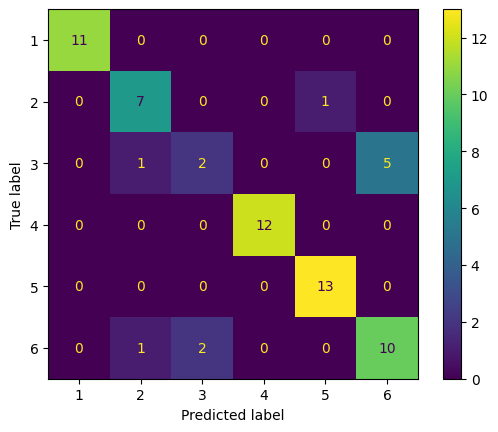

In [ ]:
## Training Random Forest classifier
dataset=temp2
rfc=RandomForestClassifier(criterion= 'entropy', max_depth= 50, max_features= 5, max_leaf_nodes= 50,min_samples_split=2,n_estimators=2000,oob_score=True)
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
rfc.fit(X_train,y_train)
y_test_pred=rfc.predict(X_test)
y=f1_score(y_test,y_test_pred,average='macro') 
x=confusion_matrix(y_test,y_test_pred)
a=accuracy_score(y_test,y_test_pred)
print('F1_macro=',y)
print(x)
print('Accuracy=',a)
print('OOB validation score=',rfc.oob_score_)
estimators.append(print_estimator_name(rfc))
f1_macro.append(y)
accuracy.append(a)
plot_confusion_matrix(rfc,X_test,y_test)
plt.show()

In [ ]:
# Load the CSV file containing the test data
test_data = pd.read_csv('D:/EDI/SEM 6/testing2.csv')

# Perform prediction on the test data
predicted_labels = rfc.predict(test_data)

# Print the predicted labels
print("Predicted labels for the test data:")
print(predicted_labels[0])

C:\Users\Shree\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predicted labels for the test data:
3


In [ ]:
estimators

['SVC',
 'KNeighborsClassifier',
 'DecisionTreeClassifier',
 'RandomForestClassifier']

In [ ]:
for i in np.arange(len(estimators)):
    f1_macro[i]=round(f1_macro[i],3)
    accuracy[i]=round(accuracy[i],3)

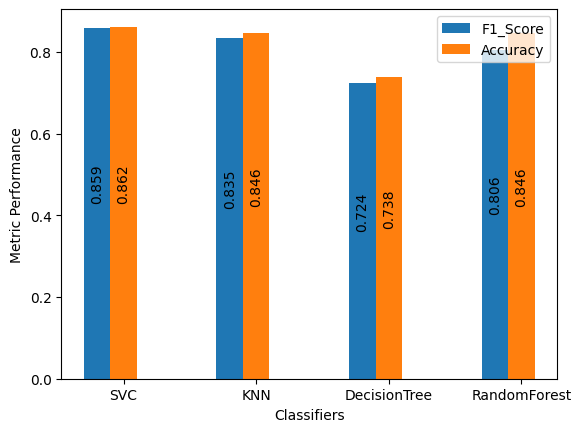

In [ ]:
## plotting results of comparative study
estimators=['SVC','KNN','DecisionTree','RandomForest']
fig, ax = plt.subplots()
width=0.2
bar_plot1 = ax.bar(np.arange(len(estimators)),f1_macro,width,tick_label=estimators)
bar_plot2 = ax.bar(np.arange(len(estimators))+width,accuracy,width,tick_label=estimators)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Metric Performance')
ax.legend(('F1_Score','Accuracy'),loc='upper right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,height,ha='center', va='bottom', rotation=90)
autolabel(bar_plot1)
autolabel(bar_plot2)
plt.show()

In [ ]:
import pyfirmata
import time

# Define the servo pin
servo_pin1 = 10
servo_pin2 = 11
servo_pin3 = 3
servo_pin4 = 6
servo_pin5 = 5

# Connect to the Arduino
board = pyfirmata.Arduino('COM9')  # Replace with the appropriate port

# Initialize the servo
servo1 = board.get_pin('d:{}:s'.format(servo_pin1))
servo2 = board.get_pin('d:{}:s'.format(servo_pin2))
servo3 = board.get_pin('d:{}:s'.format(servo_pin3))
servo4 = board.get_pin('d:{}:s'.format(servo_pin4))
servo5 = board.get_pin('d:{}:s'.format(servo_pin5))

In [ ]:
if pred_class == 1:
          servo1.write(30)
          servo2.write(100)
          servo3.write(30)
          servo4.write(30)
          servo5.write(120)
          time.sleep(1)
          
elif pred_class == 4:
          servo1.write(30)
          servo2.write(100)
          servo3.write(120)
          servo4.write(30)
          servo5.write(30)
          time.sleep(1)
    
elif pred_class == 3:
          servo1.write(30)
          servo2.write(100)
          servo3.write(30)
          servo4.write(30)
          servo5.write(30)
          time.sleep(1)
    
elif pred_class == 2:
          servo1.write(30)
          servo2.write(30)
          servo3.write(30)
          servo4.write(30)
          servo5.write(30)
          time.sleep(1)
    
elif pred_class == 5:
          servo1.write(120)
          servo2.write(120)
          servo3.write(120)
          servo4.write(120)
          servo5.write(120)
          time.sleep(1)
    
else:
          servo1.write(100)
          servo2.write(80)
          servo3.write(100)
          servo4.write(100)
          servo5.write(100)
          time.sleep(1)